# Download mnist dataset


In [1]:
#Import the tensorflow.keras.datasets.mnist module so we can load the dataset
from tensorflow.keras.datasets import mnist

In [2]:
#Now load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Explore the mnist dataset

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

# Visulise the dataset

In [7]:
#Import matplotlib
import matplotlib.pyplot as plt

In [8]:
#Import seaborn
import seaborn as sns

In [9]:
#Select the font scale
sns.set(font_scale=2)

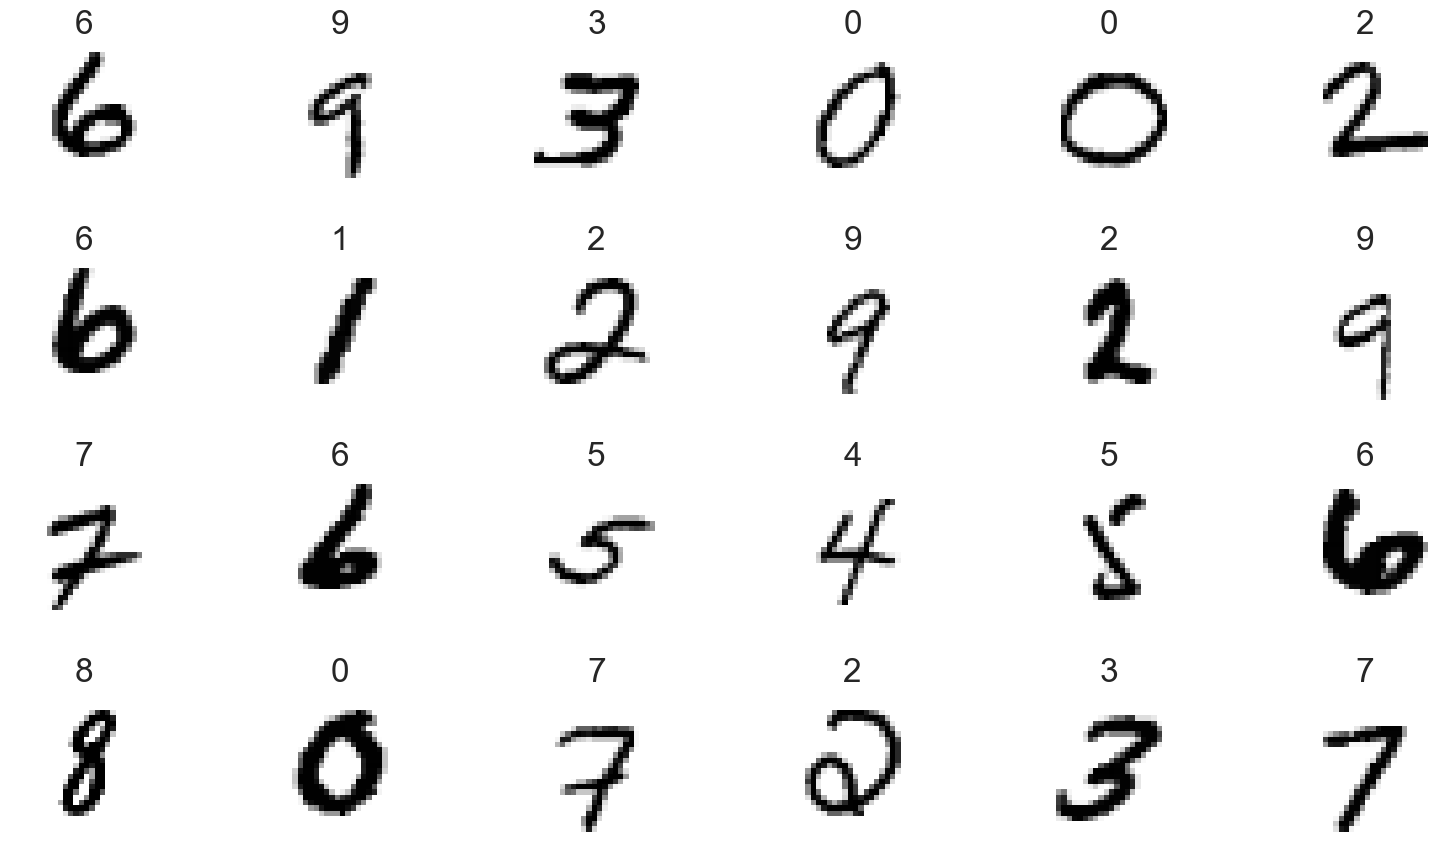

In [10]:
#Run this snippet multiple times to see additional randomly selected digits.
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

# Data Preparation
## Reshaping the Image Data

In [11]:
#CNN require images to be in the shape (width, height, channels)
#Reshape the X_train dataset
#Why channels is 1 in this case, answer using another # line
X_train = X_train.reshape((60000, 28, 28, 1))
# '1' Is used for the challenge because the model is using greyscale images (Scaling from 0 to 255). If we were to use coloured images for the model, we would require 3 channels. One for each RGB colour (Red, Green, Blue)

In [12]:
#Check the shape now, what has changed
X_train.shape

(60000, 28, 28, 1)

In [13]:
#Now do the same for X_test
X_test = X_test.reshape((10000, 28, 28, 1))

In [14]:
#Check the shape now
X_test.shape

(10000, 28, 28, 1)

# Normalizing the Image Data

In [ ]:
#Do you still remember what is normalisation?
# A: Normalisation is done to scale data values within a certain range. Normalisation is done to ensure variables with high values don't exert too much influence over low values.
#Normalisation in this case, we are dividing the X_train values by 255 because the greyscale pixel intensity ranges from 0-255. This is done make model optimisation easier and to speed up the training process.
#Now normalise the X_train
X_train = X_train.astype('float32') / 255

In [16]:
#Do the same for X_test
X_test = X_test.astype('float32') / 255

# One-Hot Encoding: Converting the Labels From Integers to Categorical Data

In [17]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
y_test = to_categorical(y_test)
y_test.shape
#Explain what has changed and why using a new # line

(10000, 10)

# Creating the Neural Network

In [20]:
#Import sequential from keras models
from tensorflow.keras.models import Sequential
cnn = Sequential()

: 

# Adding Layers to the Network

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Adding a Convolution Layer

In [ ]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
#Define activation function?
#Mathematical function that is applied to each node or neuron in a neural network.
#Function used is called 'ReLU'.
#In this case, the activation function will cause each neuron in the convolution layer to either output a '0' or the input itself if it is positive.

# Dimensionality of the First Convolution Layer’s Output

# Adding a Pooling Layer

In [ ]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
#What is max pooling techanique and why it is used?
#Max pooling is a type of downsampling operation that is applied in convolution neural networks.
#It is used to reduce spatial dimensions of feature maps while preserving the highest value.
#This technique is used to help make the network more efficient and to reduce the risk of overfitting the model, as well as reducing computational load by reducing the number of parameters in the network.

# Adding Another Convolutional Layer and Pooling Layer

In [ ]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the Results

In [ ]:
cnn.add(Flatten())

# Adding a Dense Layer to Reduce the Number of Features

In [ ]:
cnn.add(Dense(units=128, activation='relu'))

# Adding Another Dense Layer to Produce the Final Output

In [ ]:
cnn.add(Dense(units=10, activation='softmax'))

# Printing the Model’s Summary

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

# Visualizing a Model’s Structure

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
            show_layer_names=True)
Image(filename='convnet.png')

AttributeError: module 'pydot' has no attribute 'InvocationException'

# Compiling the Model

In [ ]:
cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


# Training and Evaluating the Model

In [ ]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64,
              validation_split=0.1)

# Evaluating the Model

In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

In [ ]:
loss

In [ ]:
accuracy

# Making Predictions

In [ ]:
predictions = cnn.predict(X_test)

In [ ]:
y_test[0]

In [ ]:
for index, probability in enumerate(predictions[0]):
          print(f'{index}: {probability:.10%}')

# Locating the Incorrect Predictions

In [ ]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [ ]:
len(incorrect_predictions)

# Visualizing Incorrect Predictions

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(
        f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

# Displaying the Probabilities for Several Incorrect Predictions

In [ ]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')


In [ ]:
display_probabilities(predictions[495])

In [ ]:
display_probabilities(predictions[583])

# Saving and Loading a Model

In [ ]:
#Save the model in a directory
!mkdir -p saved_model
cnn.save('saved_model/mnist_cnn.h5')

In [ ]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/model.h5



In [ ]:
# Load the model
from tensorflow.keras.models import load_model
cnn = load_model('saved_model/mnist_cnn.h5')
# Check its architecture
cnn.summary()